import library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data preprocessing

In [3]:
application_train = pd.read_csv("home-credit-default-risk/application_train.csv")
print("Jumlah baris : ",application_train.shape[0])
print("Jumlah kolom : ",application_train.shape[1])
application_train.head()

Jumlah baris :  307511
Jumlah kolom :  122


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Melihat semua fitur application_train
print(application_train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [6]:
application_train.shape

(307511, 122)

In [8]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in application_train.columns:
    # Count the number of missing values
    missing_values = application_train[col].isnull().sum()
    
    # Count the number of duplicates based on SK_ID_CURR
    duplicates = application_train.duplicated(subset=['SK_ID_CURR', col]).sum()
    
    # Check for outliers (assuming a normal distribution)
    if application_train[col].dtype in ['int64', 'float64']:
        mean = application_train[col].mean()
        std = application_train[col].std()
        outliers = ((application_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+------------------------------+----------------+------------+----------+
|           Variable           | Missing Values | Duplicates | Outliers |
+------------------------------+----------------+------------+----------+
|          SK_ID_CURR          |       0        |     0      |    0     |
|            TARGET            |       0        |     0      |  24825   |
|      NAME_CONTRACT_TYPE      |       0        |     0      |   N/A    |
|         CODE_GENDER          |       0        |     0      |   N/A    |
|         FLAG_OWN_CAR         |       0        |     0      |   N/A    |
|       FLAG_OWN_REALTY        |       0        |     0      |   N/A    |
|         CNT_CHILDREN         |       0        |     0      |   4272   |
|       AMT_INCOME_TOTAL       |       0        |     0      |   454    |
|          AMT_CREDIT          |       0        |     0      |   3255   |
|         AMT_ANNUITY          |       12       |     0      |   2959   |
|       AMT_GOODS_PRICE        |      

In [14]:
for i in ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
  rata_data = application_train[i].mean()
  print(i, rata_data)
  application_train.fillna(rata_data, inplace=True)

AMT_ANNUITY 27108.573909183444
AMT_GOODS_PRICE 537933.9866884331
OWN_CAR_AGE 17893.269404400777
AMT_REQ_CREDIT_BUREAU_MON 3660.3308666531843
AMT_REQ_CREDIT_BUREAU_QRT 3660.329204924011
AMT_REQ_CREDIT_BUREAU_YEAR 3661.7430210151424


In [17]:
# List variabel yang ingin diatasi outlier
variables_to_clean = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for variable in variables_to_clean:
    # Menghitung nilai rata-rata dan standar deviasi
    mean_value = application_train[variable].mean()
    std_value = application_train[variable].std()
    
    # Menentukan batas atas dan batas bawah untuk outlier (misal: 3 kali standar deviasi)
    lower_limit = mean_value - 3 * std_value
    upper_limit = mean_value + 3 * std_value
    
    # Membersihkan outlier dengan menggantikan nilainya dengan nilai rata-rata
    application_train[variable] = application_train[variable].apply(lambda x: mean_value if x < lower_limit or x > upper_limit else x)

    # Opsional: Menampilkan informasi tentang data bersih
    print(f"Variable: {variable}, Mean after cleaning: {application_train[variable].mean()}, Std after cleaning: {application_train[variable].std()}")

# Opsional: Menampilkan informasi setelah membersihkan semua variabel
print("Summary after cleaning:")
print(application_train.describe())


Variable: TARGET, Mean after cleaning: 0.006517142290899099, Std after cleaning: 0.02199203566123286
Variable: CNT_CHILDREN, Mean after cleaning: 0.3785186385734343, Std after cleaning: 0.6370534894900894
Variable: AMT_INCOME_TOTAL, Mean after cleaning: 166691.92833360704, Std after cleaning: 87511.9121329603
Variable: AMT_CREDIT, Mean after cleaning: 582884.2966513135, Std after cleaning: 369318.2537653731
Variable: AMT_ANNUITY, Mean after cleaning: 26521.87040003182, Std after cleaning: 12996.051362775414
Variable: AMT_GOODS_PRICE, Mean after cleaning: 519168.9900979074, Std after cleaning: 330883.6824511791
Variable: REGION_POPULATION_RELATIVE, Mean after cleaning: 0.019455496777773938, Std after cleaning: 0.01078708901557856
Variable: DAYS_REGISTRATION, Mean after cleaning: -4957.474871360676, Std after cleaning: 3473.9851041718352
Variable: OWN_CAR_AGE, Mean after cleaning: 17893.269404400777, Std after cleaning: 12836.719358996745
Variable: AMT_REQ_CREDIT_BUREAU_MON, Mean after c

In [18]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in application_train.columns:
    # Count the number of missing values
    missing_values = application_train[col].isnull().sum()
    
    # Count the number of duplicates based on SK_ID_CURR
    duplicates = application_train.duplicated(subset=['SK_ID_CURR', col]).sum()
    
    # Check for outliers (assuming a normal distribution)
    if application_train[col].dtype in ['int64', 'float64']:
        mean = application_train[col].mean()
        std = application_train[col].std()
        outliers = ((application_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+------------------------------+----------------+------------+----------+
|           Variable           | Missing Values | Duplicates | Outliers |
+------------------------------+----------------+------------+----------+
|          SK_ID_CURR          |       0        |     0      |    0     |
|            TARGET            |       0        |     0      |  24825   |
|      NAME_CONTRACT_TYPE      |       0        |     0      |   N/A    |
|         CODE_GENDER          |       0        |     0      |   N/A    |
|         FLAG_OWN_CAR         |       0        |     0      |   N/A    |
|       FLAG_OWN_REALTY        |       0        |     0      |   N/A    |
|         CNT_CHILDREN         |       0        |     0      |    0     |
|       AMT_INCOME_TOTAL       |       0        |     0      |   5329   |
|          AMT_CREDIT          |       0        |     0      |   2580   |
|         AMT_ANNUITY          |       0        |     0      |   2401   |
|       AMT_GOODS_PRICE        |      

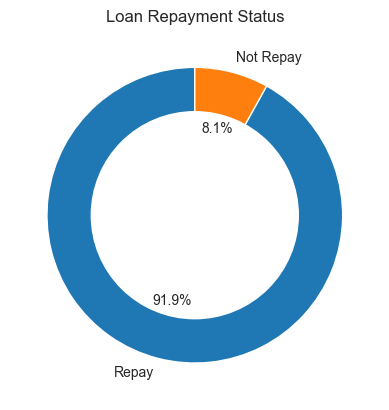

In [20]:
# Get counts of target values
target_counts = application_train['TARGET'].value_counts()

# Create figure and axis objects
fig, ax = plt.subplots()

# Create pie chart
labels = ['Repay', 'Not Repay']
pie = ax.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Create donut chart by drawing white circle in the center
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title
ax.set_title('Loan Repayment Status')

# Show chart
plt.show()

<Figure size 1000x600 with 0 Axes>

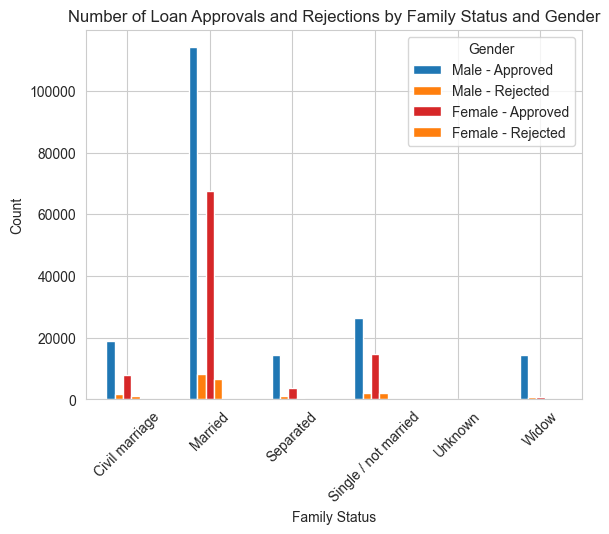

In [10]:
# create pivot table to count number of loan approvals and rejections by family status and gender
pivot_table = application_train.pivot_table(index=['NAME_FAMILY_STATUS'], columns=['CODE_GENDER', 'TARGET'], values='SK_ID_CURR', aggfunc='count')
pivot_table.columns = pivot_table.columns.map(lambda x: f"{x[0]}_{x[1]}")

# create stacked bar chart using pivot table
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = pivot_table.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#d62728', '#ff7f0e'])
ax.set_xlabel('Family Status')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections by Family Status and Gender')

# change legend labels
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male - Approved', 'Male - Rejected', 'Female - Approved', 'Female - Rejected'])
plt.show()

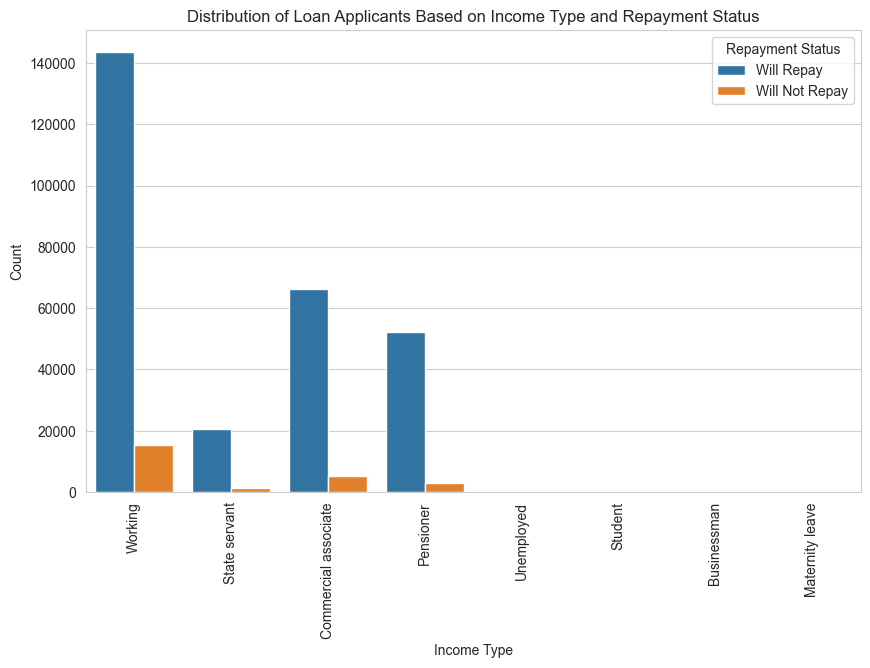

In [11]:
# create a barplot showing the distribution of loan applicants based on their income type
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Income Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Type and Repayment Status')
plt.xticks(rotation=90)

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()